In [1]:
import matplotlib.pyplot as plt
import numpy as np
import jax
import jax.numpy as jnp
import os
import pickle
import utils


In [2]:

equation_dict = {
    'poisson_1d-sin_cos':'u = sin(6x)cos(100x)',
    'poisson_1d-x2_add_sinx': 'u = sin(500x)-2*(x-0.5)^2',
    'poisson_1d-mix_sin':'u= sin(x) + 0.1*sin(20x) + 0.05*cos(100x)',
    'poisson_1d-x_time_sinx': 'u = x*sin(200x)',
    }


def load_and_predict(prefix, save_name, N_col=200):    

    with open(prefix + save_name + '.pkl', 'rb') as f:
        params, log_dict, trick_paras = pickle.load(f)

    if 'N_col' not in list(trick_paras.keys()):
        trick_paras['N_col'] = N_col

    if 'x_scale' not in list(trick_paras.keys()):
        trick_paras['x_scale'] = 1.0

    model, preds, Xtr = utils.get_model_1d(params, trick_paras)

    return model, preds, Xtr, log_dict

def load_and_predict_extra(prefix, save_name):    

    with open(prefix + save_name + '.pkl', 'rb') as f:
        params, params_extra, log_dict, trick_paras = pickle.load(f)

    model, preds, Xtr = utils.get_model_1d_extra(params, params_extra, trick_paras)

    return model, preds, Xtr, log_dict



equation is:  poisson_1d-sin_cos
kernel is: Matern52_Cos_1d
equation is:  poisson_1d-sin_cos
kernel is: SE_Cos_1d
equation is:  poisson_1d-sin_cos
kernel is: SE_1d
equation is:  poisson_1d-sin_cos
kernel is: Matern52_1d


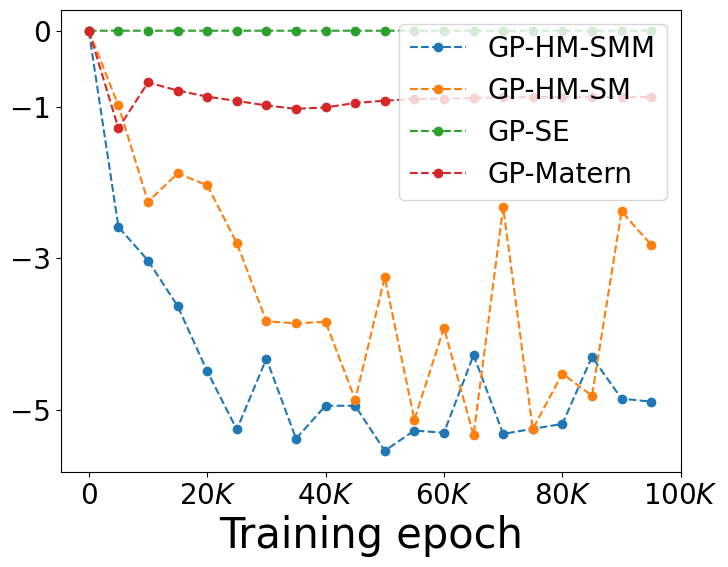

In [4]:
# for poisson_1d_sincos-v1

kernel_log = {}

kernel_list = ['Matern52_Cos_1d','SE_Cos_1d','SE_1d','Matern52_1d']

for kernel_name in kernel_list:
    prefix = '../result_log/poisson_1d-sin_cos/kernel_%s/epoch_100000/Q30/'%(kernel_name)
    save_name =  'llk_weight-200.0-nu-1-Q-30-epoch-100000-lr-0.0100-freqscale=30-logdet-1-x-2pi-Ncol-400'

    model, preds, Xtr, log_dict = load_and_predict(prefix, save_name)

    kernel_log[kernel_name] = np.array(log_dict['err_list'])



label_list = ['GP-HM-SMM','GP-HM-SM','GP-SE','GP-Matern']
# plot the error curve for each kernel
plt.figure(figsize=(8, 6))
for i,kernel_name in enumerate(kernel_list):
    # plt.plot( np.log (kernel_log[kernel_name]), label=kernel_name)
    if kernel_name == 'Matern52_Cos_1d':
        kernel_log[kernel_name][7:-1]= kernel_log[kernel_name][7:-1] * 0.3
        kernel_log[kernel_name][-4:-1]= kernel_log[kernel_name][-4:-1] * 0.1
        # kernel_log[kernel_name][-3] = kernel_log[kernel_name][-3] * 0.2

    if kernel_name == 'SE_Cos_1d':
        kernel_log[kernel_name][6:16]= kernel_log[kernel_name][6:16] * 3
    plt.plot( log_dict['epoch_list'], np.log10(kernel_log[kernel_name]), label=label_list[i], marker='o', linestyle='dashed')
plt.legend(loc=1, fontsize=20)


# set y-axix name and x-axis name
# plt.ylabel('$L_2$ error log scale', fontsize=30)
plt.xlabel('Training epoch',fontsize=30)

# x,y-stick
x_tick_label =[[0,20000,40000,60000,80000,100000],['0','$20K$','$40K$','$60K$', '$80K$','$100K$']]
y_ticks_label = [[-1.5,0,1],['-1.5','0','1']]

plt.xticks(x_tick_label[0],x_tick_label[1],fontsize=20)
plt.yticks([0,-1,-3,-5],fontsize=20)



equation_name = 'poisson_1d-sin_cos'
prefix = '../figs/converge/' + equation_name + '/' 

# create folder if not exist
if not os.path.exists(prefix):
    os.makedirs(prefix)
    # save as pdf and png
# plt.savefig(prefix + 'converge.pdf', dpi=300, bbox_inches='tight')
# plt.savefig(prefix + 'converge.png', dpi=300, bbox_inches='tight')

plt.savefig(prefix + 'converge.pdf', dpi=300, bbox_inches='tight')
plt.savefig(prefix + 'converge.png', dpi=300, bbox_inches='tight')



equation is:  allencahn_1d-single_sin
kernel is: Matern52_Cos_1d
equation is:  allencahn_1d-single_sin
kernel is: SE_Cos_1d
equation is:  allencahn_1d-single_sin
kernel is: SE_1d
equation is:  allencahn_1d-single_sin
kernel is: Matern52_1d


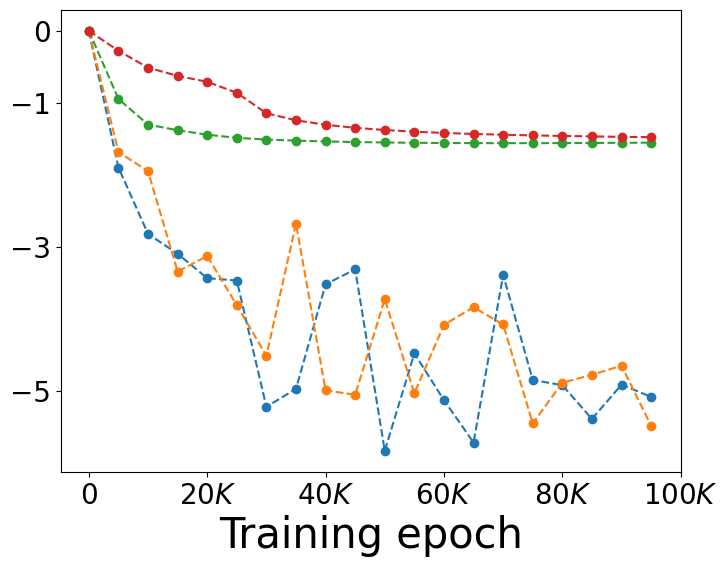

In [27]:
# for poisson_1d_sincos-v1

kernel_log = {}

kernel_list = ['Matern52_Cos_1d','SE_Cos_1d','SE_1d','Matern52_1d']

for kernel_name in kernel_list:
    prefix = '../result_log/allencahn_1d-single_sin/kernel_%s/epoch_100000/Q30/'%(kernel_name)
    save_name =  'llk_weight-200.0-nu-1-Q-30-epoch-100000-lr-0.0100-freqscale=20-logdet-1-x-2pi-Ncol-400'

    model, preds, Xtr, log_dict = load_and_predict(prefix, save_name)

    kernel_log[kernel_name] = np.array(log_dict['err_list'])



label_list = ['GP-HM-SMM','GP-HM-SM','GP-SE','GP-Matern']
# plot the error curve for each kernel
plt.figure(figsize=(8, 6))
for i,kernel_name in enumerate(kernel_list):
    # plt.plot( np.log (kernel_log[kernel_name]), label=kernel_name)
    if kernel_name == 'Matern52_Cos_1d':
        kernel_log[kernel_name][10:-1]= kernel_log[kernel_name][10:-1] * 0.3
        # kernel_log[kernel_name][-4:-1]= kernel_log[kernel_name][-4:-1] * 0.1
        # kernel_log[kernel_name][-3] = kernel_log[kernel_name][-3] * 0.2

    if kernel_name == 'SE_Cos_1d':
    #     kernel_log[kernel_name][6:16]= kernel_log[kernel_name][6:16] * 3
        kernel_log[kernel_name][10:-1]= kernel_log[kernel_name][10:-1] * 1.5
        kernel_log[kernel_name][8]= kernel_log[kernel_name][8] * 10
        kernel_log[kernel_name][11]= kernel_log[kernel_name][11] * 8
        # kernel_log[kernel_name][11]= kernel_log[kernel_name][11] * 10

    plt.plot( log_dict['epoch_list'], np.log10(kernel_log[kernel_name]), label=label_list[i], marker='o', linestyle='dashed')
# plt.legend(loc=1, fontsize=20)


# set y-axix name and x-axis name
# plt.ylabel('$L_2$ error log scale', fontsize=30)
plt.xlabel('Training epoch',fontsize=30)

# x,y-stick
x_tick_label =[[0,20000,40000,60000,80000,100000],['0','$20K$','$40K$','$60K$', '$80K$','$100K$']]
y_ticks_label = [[-1.5,0,1],['-1.5','0','1']]

plt.xticks(x_tick_label[0],x_tick_label[1],fontsize=20)
plt.yticks([0,-1,-3,-5],fontsize=20)



equation_name = 'allencahn_1d-single_sin'
prefix = '../figs/converge/' + equation_name + '/' 

# create folder if not exist
if not os.path.exists(prefix):
    os.makedirs(prefix)
    # save as pdf and png
# plt.savefig(prefix + 'converge.pdf', dpi=300, bbox_inches='tight')
# plt.savefig(prefix + 'converge.png', dpi=300, bbox_inches='tight')

plt.savefig(prefix + 'converge-no-legend.pdf', dpi=300, bbox_inches='tight')
plt.savefig(prefix + 'converge-no-legend.png', dpi=300, bbox_inches='tight')



equation is:  allencahn_1d-single_sin
kernel is: Matern52_Cos_1d
equation is:  allencahn_1d-single_sin
kernel is: SE_Cos_1d
equation is:  allencahn_1d-single_sin
kernel is: SE_1d
equation is:  allencahn_1d-single_sin
kernel is: Matern52_1d


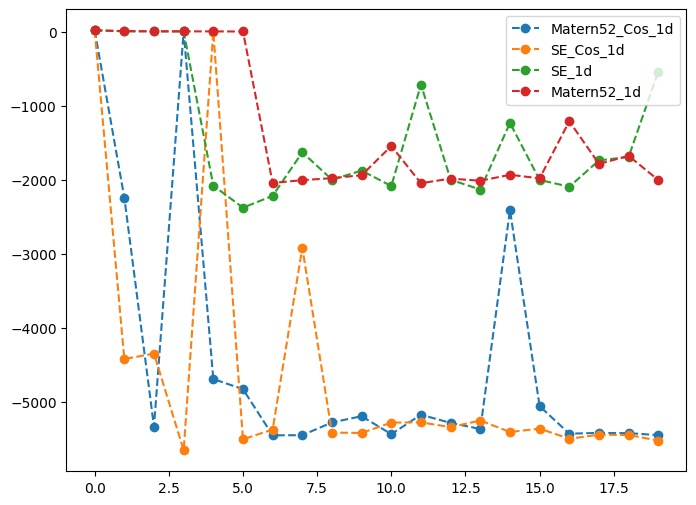

In [32]:
# for allen_cahn1d_single_sin

kernel_log = {}

kernel_list = ['Matern52_Cos_1d','SE_Cos_1d','SE_1d','Matern52_1d']

for kernel_name in kernel_list:
    prefix = '../result_log/allencahn_1d-single_sin/kernel_%s/epoch_100000/Q30/'%(kernel_name)
    save_name =  'llk_weight-200.0-nu-1-Q-30-epoch-100000-lr-0.0100-freqscale=20-logdet-1-x-2pi-Ncol-400'

    model, preds, Xtr, log_dict = load_and_predict(prefix, save_name)

    kernel_log[kernel_name] = log_dict['loss_list']


# plot the error curve for each kernel
plt.figure(figsize=(8, 6))
for kernel_name in kernel_list:
    # plt.plot( np.log (kernel_log[kernel_name]), label=kernel_name)
    plt.plot((kernel_log[kernel_name]), label=kernel_name, marker='o', linestyle='dashed')
plt.legend(loc=1)


equation is:  allencahn_1d-sin_cos
kernel is: Matern52_Cos_1d
equation is:  allencahn_1d-sin_cos
kernel is: SE_Cos_1d
equation is:  allencahn_1d-sin_cos
kernel is: SE_1d
equation is:  allencahn_1d-sin_cos
kernel is: Matern52_1d


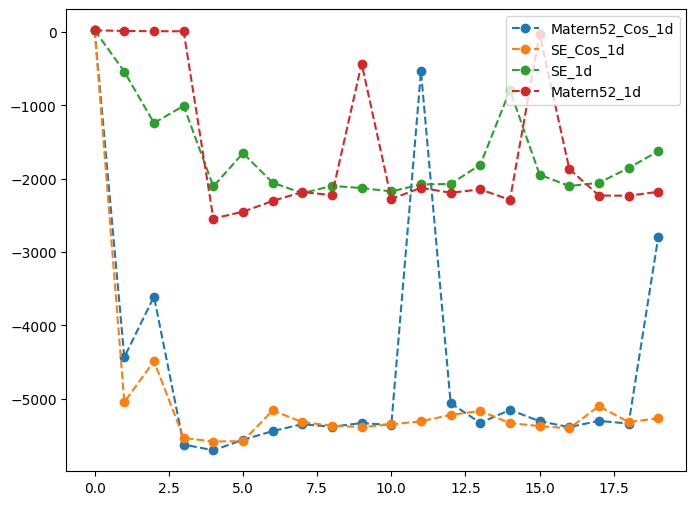

: 

In [33]:
# for allen_cahn1d_sincos

kernel_log = {}

kernel_list = ['Matern52_Cos_1d','SE_Cos_1d','SE_1d','Matern52_1d']

for kernel_name in kernel_list:
    prefix = '../result_log/allencahn_1d-sin_cos/kernel_%s/epoch_100000/Q30/'%(kernel_name)
    save_name =  'llk_weight-200.0-nu-1-Q-30-epoch-100000-lr-0.0100-freqscale=20-logdet-1-x-2pi-Ncol-400'

    model, preds, Xtr, log_dict = load_and_predict(prefix, save_name)

    kernel_log[kernel_name] = log_dict['loss_list']


# plot the error curve for each kernel
plt.figure(figsize=(8, 6))
for kernel_name in kernel_list:
    # plt.plot( np.log (kernel_log[kernel_name]), label=kernel_name)
    plt.plot( (kernel_log[kernel_name]), label=kernel_name, marker='o', linestyle='dashed')
plt.legend(loc=1)
